In [1]:
import os, sys
import pandas as pd
import numpy as np
import xarray as xr
from itertools import product
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

In [2]:
dir_in = '/g/data/er4/zk6340/Hydro_projection/data_flood_scenario_pr/20160101-20451231'
dir_out = '/g/data/er4/zk6340/Hydro_projection/data_flood_scenario_pr/20160101-20451231'

In [3]:
cluster = 9

In [4]:
# Which cluster
clusters = {1:'Central Slopes',2:'East Coast',4:'Murray Basin',5:'Monsoonal North',6:'Rangelands',7:'Southern Slopes',8:'SSW Flatlands',9:'Wet Tropics'}
which_cluster = clusters[cluster]

In [5]:
ds = pd.read_csv(os.path.join(dir_in, 'ds_flood_plot_%s.csv')%(cluster), index_col = 0)

In [6]:
ds

,GCM,Bias Correction,Emission,Change in Daily Mean,Change in daily Max,Change in Return Period
0,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp45,-7.340559,12.353862,1.646224
1,CNRM-CERFACS-CNRM-CM5,r240x120-ISIMIP2b-AWAP,rcp45,9.698512,20.131157,25.909499
2,CNRM-CERFACS-CNRM-CM5,r240x120-MRNBC-AWAP,rcp45,8.975200,32.301695,32.610170
3,CNRM-CERFACS-CNRM-CM5,r240x120-QME-AWAP,rcp45,10.698110,16.155976,28.285799
4,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp85,-6.460064,-17.164949,-15.734370
5,CNRM-CERFACS-CNRM-CM5,r240x120-ISIMIP2b-AWAP,rcp85,2.338545,16.498231,12.677093
6,CNRM-CERFACS-CNRM-CM5,r240x120-MRNBC-AWAP,rcp85,3.635032,20.495749,19.687770
7,CNRM-CERFACS-CNRM-CM5,r240x120-QME-AWAP,rcp85,4.106610,8.585997,9.764421
8,CSIRO-BOM-ACCESS1-0,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp45,-1.455860,5.445436,-0.737030
9,CSIRO-BOM-ACCESS1-0,r240x120-ISIMIP2b-AWAP,rcp45,6.571090,11.280682,9.962541


In [7]:
#column_names = ['Daily Mean','Daily Max','20-yr Return Period']
column_names = ['Change in Daily Mean','Change in daily Max','Change in Return Period']

In [8]:
ds_merge = []
for col_name in enumerate(column_names): 
    ds['Percentage Change'] = ds[col_name[1]]
    ds['Indicator'] = col_name[1]
    #ds_one = ds.drop(['Daily Mean','Daily Max','20-yr Return Period'], axis=1)
    ds_one = ds.drop(['Change in Daily Mean','Change in daily Max','Change in Return Period'], axis=1)
    ds_merge.append(ds_one)
ds_complete = pd.concat([ds_merge[0],ds_merge[1],ds_merge[2]])

In [9]:
ds_complete

,GCM,Bias Correction,Emission,Percentage Change,Indicator
0,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp45,-7.340559,Change in Daily Mean
1,CNRM-CERFACS-CNRM-CM5,r240x120-ISIMIP2b-AWAP,rcp45,9.698512,Change in Daily Mean
2,CNRM-CERFACS-CNRM-CM5,r240x120-MRNBC-AWAP,rcp45,8.975200,Change in Daily Mean
3,CNRM-CERFACS-CNRM-CM5,r240x120-QME-AWAP,rcp45,10.698110,Change in Daily Mean
4,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp85,-6.460064,Change in Daily Mean
...,...,...,...,...,...
27,NOAA-GFDL-GFDL-ESM2M,r240x120-QME-AWAP,rcp45,5.033268,Change in Return Period
28,NOAA-GFDL-GFDL-ESM2M,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp85,8.482955,Change in Return Period
29,NOAA-GFDL-GFDL-ESM2M,r240x120-ISIMIP2b-AWAP,rcp85,16.690941,Change in Return Period
30,NOAA-GFDL-GFDL-ESM2M,r240x120-MRNBC-AWAP,rcp85,10.556355,Change in Return Period


In [10]:
ds_complete.loc[ds_complete['Indicator'] == 'Change in Daily Mean', 'Indicator'] = 'Daily Mean'
ds_complete.loc[ds_complete['Indicator'] == 'Change in daily Max', 'Indicator'] = 'Daily Max'
ds_complete.loc[ds_complete['Indicator'] == 'Change in Return Period', 'Indicator'] = 'Return Period'

In [11]:
ds_complete

,GCM,Bias Correction,Emission,Percentage Change,Indicator
0,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp45,-7.340559,Daily Mean
1,CNRM-CERFACS-CNRM-CM5,r240x120-ISIMIP2b-AWAP,rcp45,9.698512,Daily Mean
2,CNRM-CERFACS-CNRM-CM5,r240x120-MRNBC-AWAP,rcp45,8.975200,Daily Mean
3,CNRM-CERFACS-CNRM-CM5,r240x120-QME-AWAP,rcp45,10.698110,Daily Mean
4,CNRM-CERFACS-CNRM-CM5,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp85,-6.460064,Daily Mean
...,...,...,...,...,...
27,NOAA-GFDL-GFDL-ESM2M,r240x120-QME-AWAP,rcp45,5.033268,Return Period
28,NOAA-GFDL-GFDL-ESM2M,CSIRO-CCAM-r3355-r240x120-ISIMIP2b-AWAP,rcp85,8.482955,Return Period
29,NOAA-GFDL-GFDL-ESM2M,r240x120-ISIMIP2b-AWAP,rcp85,16.690941,Return Period
30,NOAA-GFDL-GFDL-ESM2M,r240x120-MRNBC-AWAP,rcp85,10.556355,Return Period


(array([-20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 7 Text yticklabel objects>)

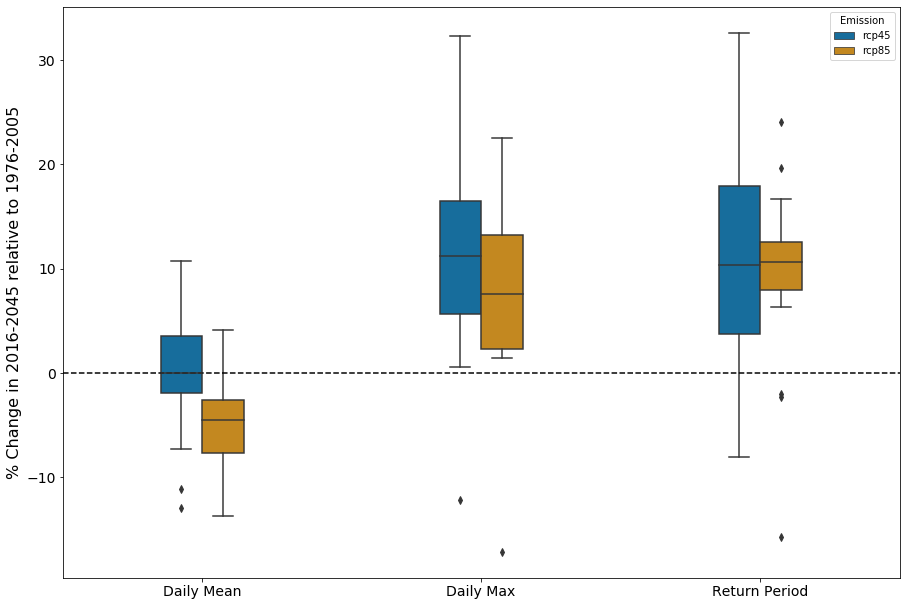

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 10.5))
sns.boxplot(x="Indicator", y="Percentage Change", hue="Emission", data=ds_complete, palette="colorblind", ax=ax, width = 0.3)
plt.axhline(y=0, color='k', linestyle='--')
plt.ylabel("% Change in 2016-2045 relative to 1976-2005", size=16)
plt.xlabel("",size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title("Projected Flood Scenario over %s"%(which_cluster), size=18)
# output_file = 'Flood_plot_%s.jpeg'%(which_cluster) 
# plt.savefig(os.path.join(dir_out,output_file))